Graph has 107 nodes and 352 edges.


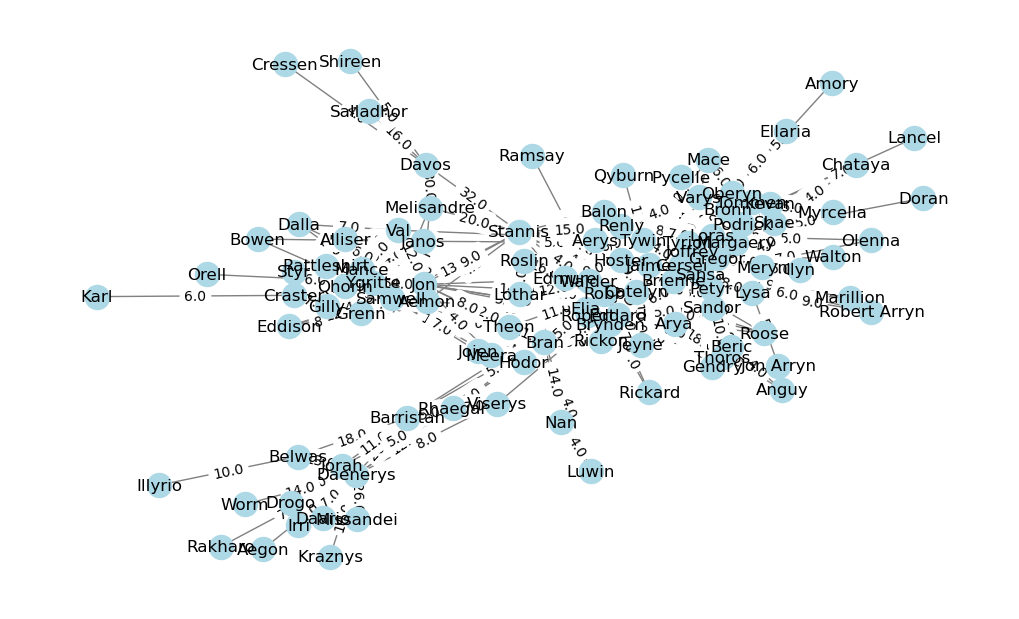

In [9]:
import networkx as nx  # NetworkX номын санг импортлож, граф боловсруулахад ашиглана
import pandas as pd  # Pandas номын санг импортлож, өгөгдлийг боловсруулахад ашиглана
import matplotlib.pyplot as plt  # Matplotlib-ийг график дүрслэл хийхэд ашиглана
import numpy as np  # NumPy-ийг тоон тооцоололд ашиглана

def read_net_w(filename):  # Файл уншиж, граф үүсгэх функц
    g = nx.Graph()  # NetworkX граф объект үүсгэнэ
    with open(filename, encoding="utf-8") as f:  # Файлыг UTF-8 кодчиллоор нээж унших
        next(f)  # Эхний мөрийг алгасна (толгой мөр)
        for line in f:  # Файлын мөрүүдийг ээлжлэн уншина
            parts = line.strip().split(",")  # Мөрийг таслалаар задална
            if len(parts) == 3:  # Мөр гурван элементтэй байвал (2 зангилаа + жин)
                node1, node2, weight = parts[0].strip(), parts[1].strip(), float(parts[2])  # Өгөгдлийг ялгаж, цэвэрлэнэ
                g.add_edge(node1, node2, weight=weight)  # Зангилаануудын хооронд жинтэй холбоос нэмнэ
    return g  # Боловсруулсан графыг буцаана

# Game of Thrones өгөгдлийг ачааллах
g = read_net_w('got-edges.csv')  # Файлаас өгөгдлийг уншиж, граф үүсгэнэ

# Графын үндсэн мэдээллийг хэвлэх
print(f"Graph has {g.number_of_nodes()} nodes and {g.number_of_edges()} edges.")  # Графын зангилаа болон холбоосын тоог хэвлэнэ

# Графыг дүрслэх
plt.figure(figsize=(10, 6))  # Зураг зурах самбарын хэмжээг тодорхойлох (10x6 инч)
pos = nx.spring_layout(g)  # Графын зангилаануудын байрлалыг тодорхойлох

edges = nx.get_edge_attributes(g, 'weight')  # Холбоосуудын жинг хадгалах

nx.draw(g, pos, with_labels=True, node_color="lightblue", edge_color="gray")  # Графыг зангилааны шошготойгоор зурна
nx.draw_networkx_edge_labels(g, pos, edge_labels=edges)  # Холбоосын жинг зураг дээр нэмнэ

plt.show()  # Зурсан графыг дэлгэцэнд харуулна


In [11]:
def node_overlap(g):  # Функц нь графыг параметр болгон хүлээж авна
    for u, v in g.edges():  # Графын бүх холбоос (edge)-ыг давталтаар авч үзнэ
        n_u = set(g.neighbors(u))  # u зангилааны хөршүүдийн (салбарласан зангилаануудын) олонлог
        n_v = set(g.neighbors(v))  # v зангилааны хөршүүдийн олонлог
        overlap = len(n_u & n_v) / len(n_u | n_v)  # Давхцлын хэмжээг Жакардын коэффициентээр тооцоолно
        g[u][v]['overlap'] = overlap  # Холбоос дээр 'overlap' нэртэй шинж чанар болгон хадгална
    return g  # Өөрчлөлт хийсэн графыг буцаана

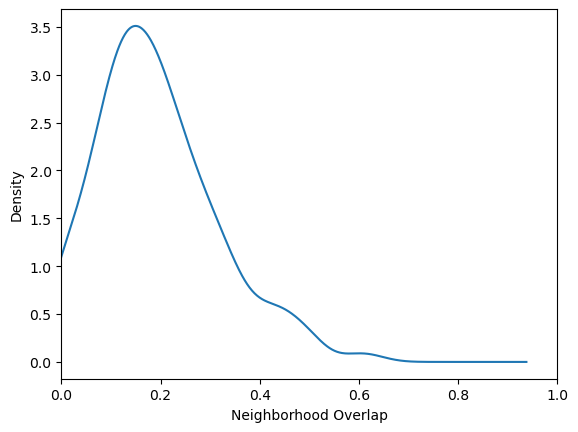

In [17]:
def node_overlap(g):
    for u, v in g.edges():
        n_u = set(g.neighbors(u))  
        n_v = set(g.neighbors(v))  
        if len(n_u | n_v) > 0:  # Хоосон хуваарь гаргахгүй байх
            overlap = len(n_u & n_v) / len(n_u | n_v)
        else:
            overlap = 0  # Хэрэв нийтлэг хөрш байхгүй бол 0 онооно
        g[u][v]['overlap'] = overlap
    return g

# Game of Thrones өгөгдлийг унших
g = read_net_w('got-edges.csv')

# **Node overlap-ийг тооцоолж, графын холбоосуудад хадгалах**
g = node_overlap(g)

# **Бүх холбоосын 'overlap' утгыг авах**
weights = [attr.get('overlap', 0) for _, _, attr in g.edges(data=True)]  

# **DataFrame-д хөрвүүлж, KDE график зурах**
df = pd.DataFrame(weights, columns=["overlap"])
df["overlap"].plot.kde()

plt.xlabel("Neighborhood Overlap")  # X-тэнхлэгийн гарчиг
plt.xlim(0, 1)  # X-тэнхлэгийн хязгаар
plt.show()  # Графикийг дүрслэх


In [19]:
# **Эрдос-Рений (Erdős-Rényi) санамсаргүй граф үүсгэх**
er = nx.erdos_renyi_graph(1000, 0.001)  
# 1000 оройтой, 0.001 магадлалтай санамсаргүй холбоосууд үүсгэнэ.

# **Барабаси-Альберт (Barabási–Albert) масштабаас хамаарах граф үүсгэх**
ba = nx.barabasi_albert_graph(1000, 2)  
# 1000 оройтой, шинэ орой бүр 2 холбоос нэмдэг граф үүсгэнэ.

# **Графын оройн зэрэг (degree) авах**
er_degs = list(dict(er.degree()).values())  
# Эрдос-Рений графын бүх оройн зэрэг (хэдэн холбоостойг) жагсаалт болгоно.

ba_degs = list(dict(ba.degree()).values())  
# Барабаси-Альберт графын бүх оройн зэрэг жагсаалт болгоно.

# **Molloy-Reed тооцоолол**
def molloy_reed(degrees):
    return (np.mean(degrees) * (np.mean(degrees) + 1)) / np.mean(degrees)  
    # Оройн зэрэглэлийн дундаж, дундаж+1-ийг ашиглаж Molloy-Reed хэмжигдэхүүнийг бодно.

# **Графын задарлын босго (breakdown threshold)**
def breakdown_threshold(degrees):
    K = molloy_reed(degrees)  # Molloy-Reed хэмжигдэхүүнийг тооцоолох
    return 1 - (1 / (K - 1))  
    # Граф задарч эхлэх босго утгыг тооцоолно.


In [27]:

# **Санамсаргүй орой сонгох функц**
def random_node(g):
    return [np.random.choice(g.nodes())]  
    # Графын бүх оройноос санамсаргүй нэгийг сонгоод жагсаалтад хийж буцаана.

# **Граф задлах (dismantle) алгоритм**
def dismantle(g, function, **args):
    total_nodes = g.number_of_nodes()  # Графын нийт оройны тоог хадгалах
    removed_nodes = []  # Устгасан оройнуудын хувь хэмжээг хадгалах жагсаалт
    components = []  # Томоохон холбогдсон хэсгийн хэмжээг хадгалах

    while len(g.nodes()) > 1:  # Графын орой 1-ээс их байгаа тохиолдолд давтана
        n = function(g, **args)[0]  # Орой сонгох функцыг ашиглаж нэг орой сонгох
        g.remove_node(n)  # Сонгосон оройг графаас устгах
        removed_nodes.append((len(removed_nodes) + 1) / total_nodes)  
        # Устгасан оройны хувь хэмжээг хадгалах

        comps = list(nx.connected_components(g))  # Одоогийн графын холбогдсон хэсгүүдийг авах
        g_size = 0  # Хамгийн том хэсгийн хэмжээг хадгалах хувьсагч
        if len(comps) > 0:
            g_size = max([len(c) for c in comps]) / total_nodes  
            # Хамгийн том хэсгийн оройн тоог нийт оройн тоонд харьцуулан хадгалах
        components.append(g_size)  # Хамгийн том хэсгийн хэмжээг хадгалах

    return removed_nodes, components  # Устгасан орой болон том хэсгийн хэмжээг буцаах

# **Графын оройг тодорхой оноогоор эрэмбэлэх**
def get_sorted_nodes(g, score, reverse=True):
    nodes = score(g)  # Графын оройнуудын оноог авах
    if isinstance(nodes, dict):  
        nodes = [(k, v) for k, v in nodes.items()]  
        # Оноо нь толь хэлбэртэй байвал жагсаалт руу хөрвүүлэх

    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)  
    # Онооны дагуу эрэмбэлэх (өсөх эсвэл буурах дарааллаар)

    return [x[0] for x in srt]  
    # Зөвхөн оройнуудыг агуулсан жагсаалт буцаах

# **Задлах (dismantle) үйл явцыг графикаар харуулах**
def plot_dismantle(x, y):
    plt.plot(x, y)  # X, Y утгуудаар график зурах
    plt.xlabel("Removed Nodes")  # X тэнхлэгийн нэрийг тодорхойлох
    plt.ylabel("Giant Component size")  # Y тэнхлэгийн нэрийг тодорхойлох
    plt.show()  # Графикийг дүрслэх

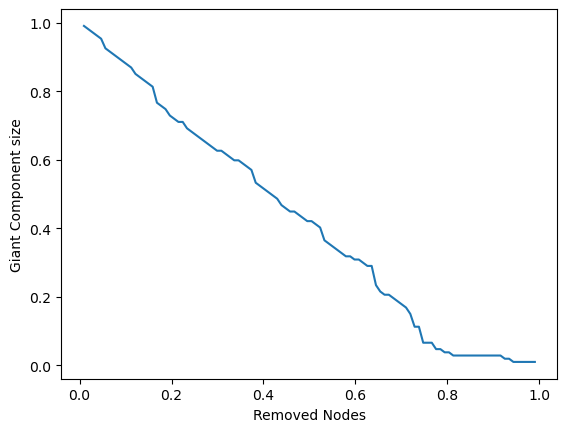

In [31]:
h = g.copy()  # g-ыг хуулбарлаж, h гэж нэрлэж байгаа объект үүсгэж байна
rn, comps = dismantle(h, random_node)  # h объект дээр random_node-ийг ашиглан dismantle функцийг дуудна. rn болон comps гэсэн хоёр хувьсагчид үр дүнг хадгална
plot_dismantle(rn, comps)  # rn болон comps-ыг ашиглан dismantle-ийг графикаар дүрсэлнэ


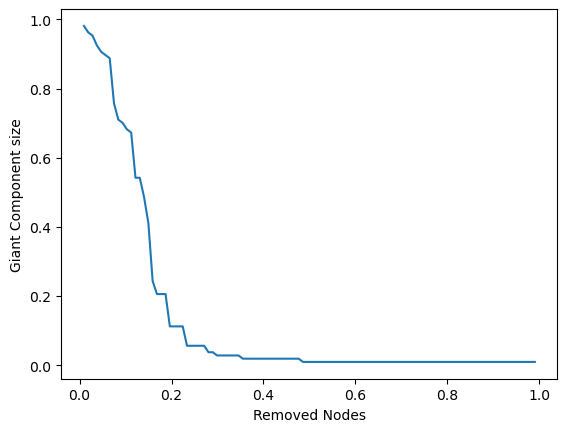

In [33]:
h = g.copy()  # g графын хуулбарыг авч, h гэсэн шинэ хувьсагчид хадгална
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)  # h граф дээр get_sorted_nodes болон nx.degree-ийг ашиглан dismantle функцийг дуудна. rn болон comps хувьсагчдад үр дүнг хадгална
plot_dismantle(rn, comps)  # rn болон comps-ыг ашиглан dismantle-ийг графикаар дүрсэлнэ


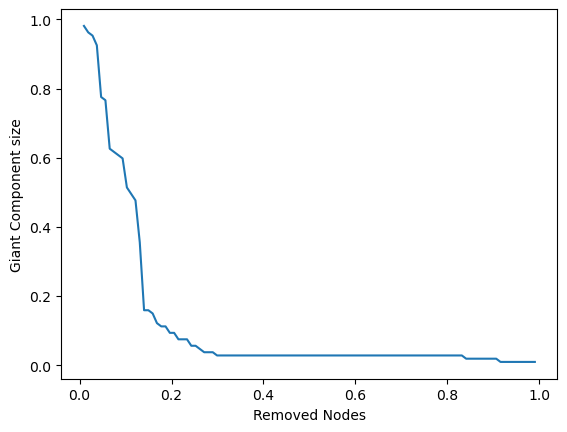

In [35]:
h = g.copy()  # g графын хуулбарыг авч, h гэсэн шинэ хувьсагчид хадгална
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)  # h граф дээр get_sorted_nodes болон nx.betweenness_centrality-ийг ашиглан dismantle функцийг дуудна. rn болон comps хувьсагчдад үр дүнг хадгална
plot_dismantle(rn, comps)  # rn болон comps-ыг ашиглан dismantle-ийг графикаар дүрсэлнэ
